In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [203]:
df=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/train.csv')

In [204]:
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [205]:
from sklearn import preprocessing

In [206]:
le = preprocessing.LabelEncoder()

In [207]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)

In [208]:
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1


In [209]:
df['Property_Area']=le.fit_transform(df['Property_Area'])


In [210]:

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [211]:

df['Education']=le.fit_transform(df['Education'])

In [212]:

df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [213]:
df.tail(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
610,LP002979,Male,Yes,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,Female,No,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [328]:
fm=df.iloc[:,4:-1]
tv=df['Loan_Status']

In [329]:
from sklearn.model_selection import train_test_split
fm_train, fm_test,tv_train,tv_test=train_test_split(fm,tv,test_size=0.2)


In [330]:
print(fm_train.shape)
print(fm_test.shape)
print(tv_train.shape)
print(tv_test.shape)

(491, 8)
(123, 8)
(491,)
(123,)


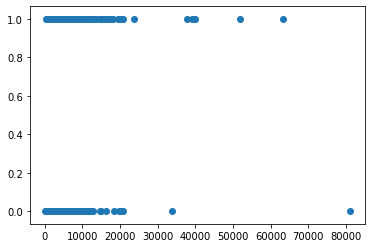

In [331]:
plt.scatter(df['ApplicantIncome'],tv)

In [332]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X=fm_train,y=tv_train)

c:\users\richu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
model.intercept_


array([-5.90043639e-05])

In [334]:
model.coef_


array([[-5.56972206e-01, -1.62991592e-02, -2.39278063e-06,
        -8.83051573e-05, -1.27207955e-03, -4.06647589e-03,
         3.10905624e+00, -6.82393069e-03]])

In [335]:
model.score(X=fm_train,y=tv_train)

0.8065173116089613

In [336]:
model.score(X=fm_test,y=tv_test)

0.8373983739837398

In [337]:
testdf=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/dataset/test_lAUu6dG.csv')
                   

In [338]:
testdf['Gender'].fillna(testdf['Gender'].mode()[0], inplace=True)
testdf['Married'].fillna(testdf['Married'].mode()[0], inplace=True)
testdf['Dependents'].fillna(testdf['Dependents'].mode()[0], inplace=True)
testdf['Loan_Amount_Term'].fillna(testdf['Loan_Amount_Term'].mode()[0], inplace=True)
testdf['Credit_History'].fillna(testdf['Credit_History'].mode()[0], inplace=True)

testdf['LoanAmount'].fillna(testdf['LoanAmount'].mean(), inplace=True)
testdf['Self_Employed'].fillna('No',inplace=True)
testdf['Education']=le.fit_transform(testdf['Education'])

testdf['Self_Employed']=le.fit_transform(testdf['Self_Employed'])
testdf['Property_Area']=le.fit_transform(testdf['Property_Area'])


In [341]:
fmtest=testdf.iloc[:,4:]

In [342]:
model.predict(X=fmtest)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,